# Team
- Agung Adipurwa
- Teguh
- Angelina

# Load Data

In [184]:
# load data
import os
import urllib.request
soal_path=os.path.join("datasets","FindIT")
download_url="https://www.kaggle.com/competitions/findit2022/data"
def fetch_data(url=download_url,path=soal_path):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("predict-case.csv","sample_submission.csv","train.csv"):
        file_path=os.path.join(path,filename)
        if not os.path.isfile(file_path):
            print("Download",filename)
            urllib.request.urlretrieve(url + filename,file_path)
  


In [185]:
# download data
fetch_data()

In [186]:
# call data
import pandas as pd
def load_soal_data(name,path=soal_path):
    csv_path=os.path.join(path,name)
    return pd.read_csv(csv_path, delimiter='|')

In [187]:
predict_case=load_soal_data("predict-case.csv")
sample_submission=load_soal_data("sample_submission.csv")
train_data=load_soal_data("train.csv")

# EDA

In [188]:
print(predict_case.shape)
print(sample_submission.shape)
print(train_data.shape)

(3000, 14)
(3000, 1)
(31746, 15)


salary                  25394
company_process_time     9144
job_benefits             6667
company_size             5163
experience_level         4292
company_industry         1514
employment_type          1344
salary_currency             4
job_description             1
id                          0
job_title                   0
location                    0
career_level                0
education_level             0
job_function                0
dtype: int64


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Counts of Missing Value: Data Train')

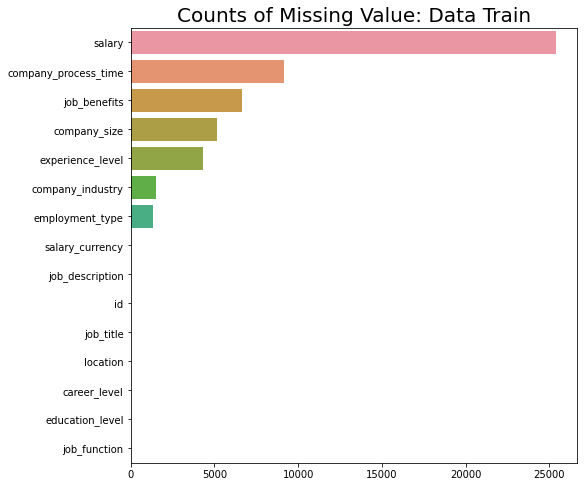

In [189]:
#Check NaN value in train_data
import matplotlib.pyplot as plt
import seaborn as sns
y = train_data.isnull().sum().sort_values(ascending=False)[:].index
x = train_data.isnull().sum().sort_values(ascending=False)[:]
print(x)
plt.figure(figsize=(8, 8))
sns.barplot(x, y)
plt.title("Counts of Missing Value: Data Train", size=20)


company_process_time    1047
job_benefits             749
company_size             480
experience_level         249
company_industry         100
id                         0
job_title                  0
location                   0
salary_currency            0
career_level               0
education_level            0
employment_type            0
job_function               0
job_description            0
dtype: int64


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Counts of Missing Value: Data Train')

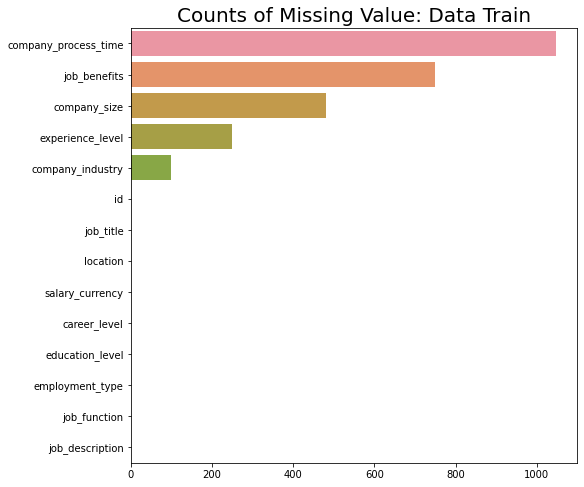

In [190]:
#Check NaN value in test_data
y = predict_case.isnull().sum().sort_values(ascending=False)[:].index
x = predict_case.isnull().sum().sort_values(ascending=False)[:]
print(x)
plt.figure(figsize=(8, 8))
sns.barplot(x, y)
plt.title("Counts of Missing Value: Data Train", size=20)


In [191]:
train_data["job_title"] = train_data["job_title"].apply(lambda item: str(item).lower())
len(train_data["job_title"].unique())


18343

In [192]:
train_data["job_title"].value_counts()[:30]

sales executive            312
management trainee         168
sales                      151
marketing                  132
sales engineer             129
accounting staff           126
digital marketing          106
graphic designer           101
sales marketing             98
content creator             92
barista                     84
staff accounting            83
accounting                  83
crew outlet                 81
project manager             79
sales manager               79
account executive           76
marketing executive         70
sales supervisor            63
marketing manager           59
it support                  56
account manager             55
it programmer               50
social media specialist     49
medical representative      49
teknisi                     48
admin                       47
business development        46
asisten apoteker            46
finance staff               44
Name: job_title, dtype: int64

In [193]:
train_data["location"] = train_data["location"].apply(
    lambda item: str(item).lower())
len(train_data["location"].unique())

199

In [194]:
train_data["location"].value_counts()[:60]


jakarta raya          7551
jakarta selatan       2365
jakarta barat         1753
tangerang             1752
jakarta utara         1453
jakarta pusat         1216
surabaya              1163
bandung                831
bekasi                 677
bali                   668
jawa barat             668
jakarta timur          639
semarang               581
jawa timur             487
bogor                  433
cikarang               428
yogyakarta             428
banten                 423
medan                  423
jawa tengah            411
aceh                   391
denpasar               284
batam                  258
makassar               232
depok                  224
sidoarjo               208
karawang               207
kalimantan barat       200
badung                 195
malang                 192
sumatera utara         184
palembang              183
balikpapan             170
jambi                  163
pekanbaru              162
surakarta              138
banjarmasin            130
p

In [195]:
train_data["employment_type"] = train_data["employment_type"].apply(
    lambda item: str(item).lower())
len(train_data["employment_type"].unique())
train_data["employment_type"].value_counts()[:60]


penuh waktu                 25940
kontrak                      3846
nan                          1344
paruh waktu                   272
magang                        193
temporer                      112
penuh waktu, kontrak           35
temporer, magang                2
penuh waktu, magang             1
penuh waktu, paruh waktu        1
Name: employment_type, dtype: int64

<AxesSubplot:>

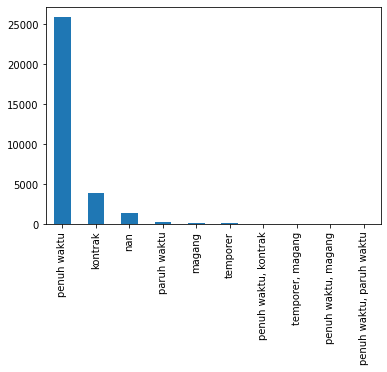

In [196]:
train_data["employment_type"].value_counts().plot(kind="bar",)


In [197]:
train_data["salary_currency"] = train_data["salary_currency"].apply(
    lambda item: str(item).lower())
len(train_data["salary_currency"].unique())
train_data["salary_currency"].value_counts()[:60]

idr    31731
usd       11
nan        4
Name: salary_currency, dtype: int64

# Cleaning Data

In [198]:
#Cleaning All NaN rows in field salary
temp_train = train_data.dropna(subset=["employment_type"])
drop_NaN_train = ["company_industry", "experience_level",
                  "company_size", "job_benefits", "company_process_time", "salary"]
for i in drop_NaN_train:
    temp_train = temp_train.dropna(subset=i)
temp_test = predict_case.dropna(subset=["company_industry"])
drop_NaN_test = ["company_industry", "experience_level",
                 "company_size", "job_benefits", "company_process_time"]
for i in drop_NaN_test:
    temp_test = temp_test.dropna(subset=i)


In [199]:
print("Clean Train Data\n{}".format(
    temp_train.isnull().sum().sort_values(ascending=False)[:]))
print("Clean Test Data\n{}".format(
    temp_test.isnull().sum().sort_values(ascending=False)[:]))


Clean Train Data
id                      0
job_title               0
location                0
salary_currency         0
career_level            0
experience_level        0
education_level         0
employment_type         0
job_function            0
job_benefits            0
company_process_time    0
company_size            0
company_industry        0
job_description         0
salary                  0
dtype: int64
Clean Test Data
id                      0
job_title               0
location                0
salary_currency         0
career_level            0
experience_level        0
education_level         0
employment_type         0
job_function            0
job_benefits            0
company_process_time    0
company_size            0
company_industry        0
job_description         0
dtype: int64


In [200]:
print(temp_train.shape)
print(temp_test.shape)

(3440, 15)
(1604, 14)


In [201]:
temp_train

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
9,10,tax supervisor,banten,idr,Supervisor/Koordinator,3 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",penuh waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22 days,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0
22,23,senior staff purchasing,surabaya,idr,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",penuh waktu,"Manufaktur,Pembelian/Manajemen Material",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,29 days,1- 50 pekerja,Elektrikal & Elektronik,Deskripsi Pekerjaan:Mampu melakukan rencana pe...,5250000.0
26,27,marketing communication & channel manager,jakarta pusat,idr,Manajer/Asisten Manajer,2 tahun,Tidak terspesifikasi,penuh waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...,29 days,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000.0
31,32,ppic,tangerang,idr,Manajer/Asisten Manajer,5 tahun,Sarjana (S1),penuh waktu,"Manufaktur,Manufaktur","Asuransi kesehatan;Waktu regular, Senin - Juma...",21 days,201 - 500 pekerja,Manufaktur/Produksi,Tanggung Jawab:Membuat perencanaan produksi be...,6600000.0
34,35,c# advanced/senior developer,jakarta timur,idr,Supervisor/Koordinator,2 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",penuh waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",5 days,1- 50 pekerja,Komputer/Teknik Informatika (Perangkat Lunak),Kualifikasi:Kandidat harus memiliki setidaknya...,9500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31673,31674,chef de partie,jakarta raya,idr,Supervisor/Koordinator,2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",penuh waktu,"Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran",Tip;Asuransi kesehatan;Pinjaman;Parkir;Jam Bek...,29 days,51 - 200 pekerja,Hotel/Pariwisata,Job Description:Strong experienced in various ...,4208095.0
31707,31708,it specialist,karawang,idr,Supervisor/Koordinator,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",penuh waktu,"Komputer/Teknologi Informasi,IT-Admin Jaringan...","Asuransi kesehatan;Waktu regular, Senin - Juma...",27 days,Lebih dari 5000 pekerja,Manufaktur/Produksi,"Job Description :Troubleshoot issues, ensure n...",8500000.0
31719,31720,sales - bandung,bandung,idr,Pegawai (non-manajemen & non-supervisor),1 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",penuh waktu,"Penjualan / Pemasaran,Penjualan Ritel",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,20 days,1- 50 pekerja,Retail/Merchandise,Tanggung Jawab :Menjaga dan meningkatkan volum...,5100000.0
31732,31733,area business development associate - madiun,madiun,idr,Supervisor/Koordinator,1 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",penuh waktu,"Penjualan / Pemasaran,Penjualan Ritel",Kasual (contoh: Kaos),21 days,51 - 200 pekerja,Komputer/Teknik Informatika (Perangkat Keras),SummaryAs an Area Business Development Associa...,8000000.0


Train data rubah si usd salary dan currenct salary  

In [202]:
temp_train.loc[(temp_train["salary_currency"]=="usd"),"salary"]=temp_train[temp_train["salary_currency"]=="usd"][["salary"]].apply(lambda i : i * 14000 )

In [203]:
temp_train[temp_train["salary_currency"]=="usd"]["salary"]

162    9310000.0
Name: salary, dtype: float64

In [204]:
temp_train.loc[(temp_train["salary_currency"]=="usd"),"salary_currency"]="idr"

In [205]:
temp_train[temp_train["salary_currency"]=="usd"]["salary_currency"]

Series([], Name: salary_currency, dtype: object)

Test data rubah salary_currency

In [206]:
temp_test[temp_test["salary_currency"]=="usd"]["salary_currency"]

Series([], Name: salary_currency, dtype: object)

tipe experience_level dan company_process_time diubah menjdi int

In [207]:
temp_train['experience_level'] = temp_train['experience_level'].str[:2]
temp_train['company_process_time'] = temp_train['company_process_time'].str[:2]

In [208]:
temp_train['experience_level'] = temp_train['experience_level'].astype(int)
temp_train['company_process_time'] = temp_train['company_process_time'].astype(int)

In [209]:
#function for retake split label field
import numpy as np
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) *test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices= shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

# DANGER ALERT DONT PLAY PLAY WITH THIS BECAUSE RANDOM

In [210]:
y_train,y_test=split_train_test(temp_train["salary"],0.2)

In [211]:
#cek data train label
y_train=y_train.sort_index()
y_train

9         8000000.0
22        5250000.0
26       15000000.0
34        9500000.0
37        6800000.0
            ...    
31670    14000000.0
31673     4208095.0
31707     8500000.0
31719     5100000.0
31744     7500000.0
Name: salary, Length: 2752, dtype: float64

In [212]:
# cek data 
y_test=y_test.sort_index()
y_test

31        6600000.0
66        3450000.0
91       22500000.0
92        6750000.0
250       5400000.0
            ...    
31523    11000000.0
31536    16000000.0
31548     7200000.0
31636     5300000.0
31732     8000000.0
Name: salary, Length: 688, dtype: float64

In [213]:
X_train = temp_train.drop(["salary"],axis=1)

In [214]:
X_train

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description
9,10,tax supervisor,banten,idr,Supervisor/Koordinator,3,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",penuh waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...
22,23,senior staff purchasing,surabaya,idr,Pegawai (non-manajemen & non-supervisor),2,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",penuh waktu,"Manufaktur,Pembelian/Manajemen Material",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,29,1- 50 pekerja,Elektrikal & Elektronik,Deskripsi Pekerjaan:Mampu melakukan rencana pe...
26,27,marketing communication & channel manager,jakarta pusat,idr,Manajer/Asisten Manajer,2,Tidak terspesifikasi,penuh waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...,29,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and..."
31,32,ppic,tangerang,idr,Manajer/Asisten Manajer,5,Sarjana (S1),penuh waktu,"Manufaktur,Manufaktur","Asuransi kesehatan;Waktu regular, Senin - Juma...",21,201 - 500 pekerja,Manufaktur/Produksi,Tanggung Jawab:Membuat perencanaan produksi be...
34,35,c# advanced/senior developer,jakarta timur,idr,Supervisor/Koordinator,2,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",penuh waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",5,1- 50 pekerja,Komputer/Teknik Informatika (Perangkat Lunak),Kualifikasi:Kandidat harus memiliki setidaknya...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31673,31674,chef de partie,jakarta raya,idr,Supervisor/Koordinator,2,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",penuh waktu,"Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran",Tip;Asuransi kesehatan;Pinjaman;Parkir;Jam Bek...,29,51 - 200 pekerja,Hotel/Pariwisata,Job Description:Strong experienced in various ...
31707,31708,it specialist,karawang,idr,Supervisor/Koordinator,5,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",penuh waktu,"Komputer/Teknologi Informasi,IT-Admin Jaringan...","Asuransi kesehatan;Waktu regular, Senin - Juma...",27,Lebih dari 5000 pekerja,Manufaktur/Produksi,"Job Description :Troubleshoot issues, ensure n..."
31719,31720,sales - bandung,bandung,idr,Pegawai (non-manajemen & non-supervisor),1,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",penuh waktu,"Penjualan / Pemasaran,Penjualan Ritel",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,20,1- 50 pekerja,Retail/Merchandise,Tanggung Jawab :Menjaga dan meningkatkan volum...
31732,31733,area business development associate - madiun,madiun,idr,Supervisor/Koordinator,1,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",penuh waktu,"Penjualan / Pemasaran,Penjualan Ritel",Kasual (contoh: Kaos),21,51 - 200 pekerja,Komputer/Teknik Informatika (Perangkat Keras),SummaryAs an Area Business Development Associa...


In [215]:
X_test=temp_test.copy()

In [216]:
X_test

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description
1,31748,"Bancassurance Officer (Area: Bali, Sulawesi Ut...",Palu,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Penjualan / Pemasaran,Penjualan - Jasa Keuangan","Asuransi kesehatan;Waktu regular, Senin - Juma...",14 days,201 - 500 pekerja,Asuransi,Bancassurance Officer adalah Representative da...
7,31754,Backend Developer,Bali,IDR,Pegawai (non-manajemen & non-supervisor),5 tahun,Tidak terspesifikasi,Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",Tunjangan Pendidikan;Tip;Asuransi kesehatan;Ol...,6 days,1- 50 pekerja,Komputer/Teknik Informatika (Perangkat Lunak),"Hello tech Indonesia,We hiring a new backend d..."
8,31755,DOCUMENT CONTROL - MANDARIN SPEAKING,Bekasi,IDR,Supervisor/Koordinator,1 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Sumber Daya Manusia/Personalia,Sekretaris","Waktu regular, Senin - Jumat;THR, BPJS, Bonus,...",14 days,1- 50 pekerja,Transportasi/Logistik,Job Description：Controlling company and projec...
9,31756,Java Spring Boot / MVC,Jakarta Pusat,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,Tidak terspesifikasi,Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak","Asuransi kesehatan;Parkir;Waktu regular, Senin...",1 day,1- 50 pekerja,Komputer/Teknik Informatika (Perangkat Lunak),Experience 1 Year In Java (Spring Boot / Sprin...
10,31757,Graphic Designer,Jakarta Barat,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Seni/Media/Komunikasi,Seni / Desain Kreatif",Smart Casual,23 days,1- 50 pekerja,Retail/Merchandise,"We are seeking a highly motivated, confident i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,34740,Sales Executive,Samarinda,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel","Asuransi kesehatan;Waktu regular, Senin - Juma...",16 days,201 - 500 pekerja,Perbankan/Pelayanan Keuangan,Tentang majoomajoo Teknologi Indonesia adalah ...
2996,34743,Frontend Developer,Jakarta Pusat,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",24 days,501 - 1000 pekerja,Perbankan/Pelayanan Keuangan,job description :1.Participate in the daily de...
2997,34744,Account Manager,Jakarta Selatan,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan - Korporasi","Asuransi kesehatan;Waktu regular, Senin - Juma...",27 days,1- 50 pekerja,Komputer/Teknik Informatika (Perangkat Keras),Tugas & Tanggung Jawab:Melakukan program pemas...
2998,34745,Sales,Palembang,IDR,Lulusan baru/Pengalaman kerja kurang dari 1 tahun,1 tahun,"SMA, SMU/SMK/STM",Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,29 days,51 - 200 pekerja,Umum & Grosir,Melakukan proses penjualan produk bahan bangun...


In [217]:
# Feature processing data
    #for the base word indog
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
ps_indo = StemmerFactory().create_stemmer()
    #for the base word eng
from nltk import PorterStemmer
ps_english=PorterStemmer()

    #for calculate per word
import nltk
nltk.download("punkt")

    # delete punctuation anoice simbol
import string

    # stop word indonesian
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory=StopWordRemoverFactory()
stop_word_indo=factory.create_stop_word_remover()
    # stop word english
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [218]:
def transform_text(text):
    # lower case
    text=text.lower()
    # tokenization per word
    text = nltk.word_tokenize(text)
    # removing the punctuation word
    y=[]
    for i in text:
        if i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    # removing the stop word
        #indo
    for i in text:
        if i not in factory.get_stop_words():
            y.append(i)
    text=y[:]
    y.clear()
        #english
    for i in text:
        if i not in stopwords.words("english"):
            y.append(i)
    text=y[:]
    y.clear()
    
    # steam data basic word
        #indo
    for i in text :
        y.append(ps_indo.stem(i))
    text=y[:]
    y.clear()
        #english
    for i in text:
        y.append(ps_english.stem(i))
    # text=y[:]
    # y.clear()
    return " ".join(y)

In [219]:
kata_indo="Aku suka yang untuk gitu namun menurut kamu dia asik"
stop_word_indo.remove(kata_indo)


'Aku suka gitu asik'

In [220]:
for i in X_train["job_benefits"]:
    if i not in factory.get_stop_words():
      data=stop_word_indo.remove(i)
data
# terlalu ekstrem anjir


'Tip;Asuransi kesehatan;Parkir;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja);Subsidi Laptop'

In [221]:
for i in X_train["job_title"]:
    if i not in stopwords.words("english"):
        print(i)

tax supervisor
senior staff purchasing
marketing communication & channel manager
ppic
c# advanced/senior developer
it software developer staff
backend developer
cook
regional sales manager (jabar, jabodetabek)
distribution center manager
api programmer
technical designer dan estimator
taxation staff
senior infosec engineer
senior software engineer - android mobile
digital and social media executive (travel & lifestyle pr)
supervisor hrd & ga
senior financial advisor (bancassurance) - jakarta pusat, pondok kelapa, cikini, thamrin
finance & adminitration head
network monitoring
accounting staff
compliance - risk management (major in statistics): supervisor - assistant manager – manager
senior associate ( ass manager )
teknisi maintenance (sipil)
telemarketing specialist
utility & environmental assistant manager
sales engineer (south sumatera & up )
teknisi alat kapal
desain grafis
marketing executive
sales executive - area jakarta & surabaya
warehouse supervisor
administration head deale

In [222]:
# coba create stemmer b indo
data_indo=[]
for i in X_train["job_benefits"]:
    data_indo=ps_indo.stem(i)
data_indo.lower()

'tip asuransi sehat parkir waktu regular senin - jumat bisnis contoh kemeja subsidi laptop'

In [223]:
# test function
transform_text("Kamu Balcked menurut sugiono jika TiDak @loved !!")
# yes succes i love sugiono

'balck sugiono love'

In [224]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440 entries, 9 to 31744
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    3440 non-null   int64 
 1   job_title             3440 non-null   object
 2   location              3440 non-null   object
 3   salary_currency       3440 non-null   object
 4   career_level          3440 non-null   object
 5   experience_level      3440 non-null   int32 
 6   education_level       3440 non-null   object
 7   employment_type       3440 non-null   object
 8   job_function          3440 non-null   object
 9   job_benefits          3440 non-null   object
 10  company_process_time  3440 non-null   int32 
 11  company_size          3440 non-null   object
 12  company_industry      3440 non-null   object
 13  job_description       3440 non-null   object
dtypes: int32(2), int64(1), object(11)
memory usage: 376.2+ KB


In [225]:
X_train["job_title"]=X_train["job_title"].apply(transform_text)

In [226]:
X_train["job_title"]

9                         tax supervisor
22                  senior staff purchas
26           market commun channel manag
31                                  ppic
34               advanced senior develop
                      ...               
31673                      chef de parti
31707                         specialist
31719                       sale bandung
31732    area busi develop associ madiun
31744        develop secur oper devsecop
Name: job_title, Length: 3440, dtype: object

In [227]:
X_train["location"]=X_train["location"].apply(transform_text)

In [228]:
X_train["location"]

9               banten
22            surabaya
26       jakarta pusat
31           tangerang
34       jakarta timur
             ...      
31673     jakarta raya
31707         karawang
31719          bandung
31732           madiun
31744    jakarta pusat
Name: location, Length: 3440, dtype: object

In [229]:
X_train["salary_currency"]=X_train["salary_currency"].apply(transform_text)

In [230]:
X_train["salary_currency"]

9        idr
22       idr
26       idr
31       idr
34       idr
        ... 
31673    idr
31707    idr
31719    idr
31732    idr
31744    idr
Name: salary_currency, Length: 3440, dtype: object

In [231]:
X_train["career_level"]=X_train["career_level"].apply(transform_text)

In [232]:
X_train["career_level"]

9                          supervisor koordin
22       pegawai non-manajemen non-supervisor
26                      manajer asisten manaj
31                      manajer asisten manaj
34                         supervisor koordin
                         ...                 
31673                      supervisor koordin
31707                      supervisor koordin
31719    pegawai non-manajemen non-supervisor
31732                      supervisor koordin
31744    pegawai non-manajemen non-supervisor
Name: career_level, Length: 3440, dtype: object

In [233]:
X_train["experience_level"]

9        3
22       2
26       2
31       5
34       2
        ..
31673    2
31707    5
31719    1
31732    1
31744    2
Name: experience_level, Length: 3440, dtype: int32

In [234]:
X_train["education_level"]=X_train["education_level"].apply(transform_text)

In [235]:
X_train["education_level"]

9        sertifikat profession d3 diploma d4 diploma sa...
22       sertifikat profession d3 diploma d4 diploma sa...
26                                             spesifikasi
31                                              sarjana s1
34       sma smu smk stm sertifikat profession d3 diplo...
                               ...                        
31673    sertifikat profession d3 diploma d4 diploma sa...
31707    sertifikat profession d3 diploma d4 diploma sa...
31719    sma smu smk stm sertifikat profession d3 diplo...
31732    sma smu smk stm sertifikat profession d3 diplo...
31744                                           sarjana s1
Name: education_level, Length: 3440, dtype: object

In [236]:
X_train["employment_type"]=X_train["employment_type"].apply(transform_text)

In [237]:
X_train["employment_type"]

9        penuh waktu
22       penuh waktu
26       penuh waktu
31       penuh waktu
34       penuh waktu
            ...     
31673    penuh waktu
31707    penuh waktu
31719    penuh waktu
31732    penuh waktu
31744    penuh waktu
Name: employment_type, Length: 3440, dtype: object

In [238]:
X_train["job_function"]=X_train["job_function"].apply(transform_text)

In [239]:
X_train["job_function"]

9                               akuntansi uang audit pajak
22                        manufaktur beli manajemen materi
26                          jual pasar pasar kembang bisni
31                                   manufaktur manufaktur
34          komputer teknolog informasi it-perangkat lunak
                               ...                        
31673            hotel restoran makan minum layan restoran
31707    komputer teknolog informasi it-admin jaring si...
31719                                jual pasar jual ritel
31732                                jual pasar jual ritel
31744    komputer teknolog informasi it-admin jaring si...
Name: job_function, Length: 3440, dtype: object

In [240]:
X_train["job_benefits"]=X_train["job_benefits"].apply(transform_text)

In [241]:
X_train["job_benefits"]

9        tip asuransi sehat waktu regular senin jumat b...
22                  asuransi sehat jam bisni contoh kemeja
26       asuransi gigi asuransi sehat parkir waktu regu...
31       asuransi sehat waktu regular senin jumat bisni...
34       tip asuransi sehat waktu regular senin jumat k...
                               ...                        
31673    tip asuransi sehat pinjam parkir jam bisni con...
31707    asuransi sehat waktu regular senin jumat compa...
31719               asuransi sehat jam bisni contoh kemeja
31732                                    kasual contoh kao
31744    tip asuransi sehat parkir waktu regular senin ...
Name: job_benefits, Length: 3440, dtype: object

In [242]:
X_train["company_process_time"]

9        22
22       29
26       29
31       21
34        5
         ..
31673    29
31707    27
31719    20
31732    21
31744    18
Name: company_process_time, Length: 3440, dtype: int32

In [243]:
X_train["company_size"]=X_train["company_size"].apply(transform_text)

In [244]:
X_train["company_size"]

9         51 200 kerja
22         1- 50 kerja
26        51 200 kerja
31       201 500 kerja
34         1- 50 kerja
             ...      
31673     51 200 kerja
31707       5000 kerja
31719      1- 50 kerja
31732     51 200 kerja
31744    201 500 kerja
Name: company_size, Length: 3440, dtype: object

In [245]:
X_train["company_industry"]=X_train["company_industry"].apply(transform_text)

In [246]:
X_train["company_industry"]

9                           konstruksi bangun teknik
22                               elektrik elektronik
26                 konsultasi ilmu tahu tekni teknik
31                               manufaktur produksi
34       komputer teknik informatika perangkat lunak
                            ...                     
31673                               hotel pariwisata
31707                            manufaktur produksi
31719                              retail merchandis
31732     komputer teknik informatika perangkat kera
31744    komputer teknik informatika perangkat lunak
Name: company_industry, Length: 3440, dtype: object

In [247]:
X_train["job_description"]=X_train["job_description"].apply(transform_text)

In [248]:
X_train["job_description"]

9        responsibilitiesprepar corpor incom tax cit an...
22       deskripsi kerja rencana beli dasar butuh targe...
26       scope role plan develop implement measur infra...
31       tanggung rencana produksi dasar market plan fo...
34       kualifikasi kandidat milik sma smk diploma gel...
                               ...                        
31673    job descript strong experienc variou chef seni...
31707    job descript troubleshoot issu ensur network s...
31719    tanggung jaga tingkat volum penjualanmenyiapka...
31732    summarya area busi develop associ run ground i...
31744    1 protect aspect sourc code2 comprehens protec...
Name: job_description, Length: 3440, dtype: object

In [249]:
X_train

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description
9,10,tax supervisor,banten,idr,supervisor koordin,3,sertifikat profession d3 diploma d4 diploma sa...,penuh waktu,akuntansi uang audit pajak,tip asuransi sehat waktu regular senin jumat b...,22,51 200 kerja,konstruksi bangun teknik,responsibilitiesprepar corpor incom tax cit an...
22,23,senior staff purchas,surabaya,idr,pegawai non-manajemen non-supervisor,2,sertifikat profession d3 diploma d4 diploma sa...,penuh waktu,manufaktur beli manajemen materi,asuransi sehat jam bisni contoh kemeja,29,1- 50 kerja,elektrik elektronik,deskripsi kerja rencana beli dasar butuh targe...
26,27,market commun channel manag,jakarta pusat,idr,manajer asisten manaj,2,spesifikasi,penuh waktu,jual pasar pasar kembang bisni,asuransi gigi asuransi sehat parkir waktu regu...,29,51 200 kerja,konsultasi ilmu tahu tekni teknik,scope role plan develop implement measur infra...
31,32,ppic,tangerang,idr,manajer asisten manaj,5,sarjana s1,penuh waktu,manufaktur manufaktur,asuransi sehat waktu regular senin jumat bisni...,21,201 500 kerja,manufaktur produksi,tanggung rencana produksi dasar market plan fo...
34,35,advanced senior develop,jakarta timur,idr,supervisor koordin,2,sma smu smk stm sertifikat profession d3 diplo...,penuh waktu,komputer teknolog informasi it-perangkat lunak,tip asuransi sehat waktu regular senin jumat k...,5,1- 50 kerja,komputer teknik informatika perangkat lunak,kualifikasi kandidat milik sma smk diploma gel...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31673,31674,chef de parti,jakarta raya,idr,supervisor koordin,2,sertifikat profession d3 diploma d4 diploma sa...,penuh waktu,hotel restoran makan minum layan restoran,tip asuransi sehat pinjam parkir jam bisni con...,29,51 200 kerja,hotel pariwisata,job descript strong experienc variou chef seni...
31707,31708,specialist,karawang,idr,supervisor koordin,5,sertifikat profession d3 diploma d4 diploma sa...,penuh waktu,komputer teknolog informasi it-admin jaring si...,asuransi sehat waktu regular senin jumat compa...,27,5000 kerja,manufaktur produksi,job descript troubleshoot issu ensur network s...
31719,31720,sale bandung,bandung,idr,pegawai non-manajemen non-supervisor,1,sma smu smk stm sertifikat profession d3 diplo...,penuh waktu,jual pasar jual ritel,asuransi sehat jam bisni contoh kemeja,20,1- 50 kerja,retail merchandis,tanggung jaga tingkat volum penjualanmenyiapka...
31732,31733,area busi develop associ madiun,madiun,idr,supervisor koordin,1,sma smu smk stm sertifikat profession d3 diplo...,penuh waktu,jual pasar jual ritel,kasual contoh kao,21,51 200 kerja,komputer teknik informatika perangkat kera,summarya area busi develop associ run ground i...


In [250]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [251]:
X_train["job_title"]=tfidf.fit_transform(X_train["job_title"]).toarray()

In [252]:
X_train["location"]=tfidf.fit_transform(X_train["location"]).toarray()

In [253]:
X_train["salary_currency"]=tfidf.fit_transform(X_train["salary_currency"]).toarray()

In [254]:
X_train["career_level"]=tfidf.fit_transform(X_train["career_level"]).toarray()

In [255]:
X_train["education_level"]=tfidf.fit_transform(X_train["education_level"]).toarray()

In [256]:
X_train["employment_type"]=tfidf.fit_transform(X_train["employment_type"]).toarray()

In [257]:
X_train["job_function"]=tfidf.fit_transform(X_train["job_function"]).toarray()

In [258]:
X_train["job_benefits"]=tfidf.fit_transform(X_train["job_benefits"]).toarray()

In [259]:
X_train["company_size"]=tfidf.fit_transform(X_train["company_size"]).toarray()

In [260]:
X_train["company_industry"]=tfidf.fit_transform(X_train["company_industry"]).toarray()

In [261]:
X_train["job_description"]=tfidf.fit_transform(X_train["job_description"]).toarray()

In [262]:
X_train

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description
9,10,0.0,0.0,1.0,0.0,3,0.346080,0.0,0.0,0.0,22,0.0,0.0,0.0
22,23,0.0,0.0,1.0,0.0,2,0.346080,0.0,0.0,0.0,29,0.0,0.0,0.0
26,27,0.0,0.0,1.0,0.0,2,0.000000,0.0,0.0,0.0,29,0.0,0.0,0.0
31,32,0.0,0.0,1.0,0.0,5,0.000000,0.0,0.0,0.0,21,0.0,0.0,0.0
34,35,0.0,0.0,1.0,0.0,2,0.244887,0.0,0.0,0.0,5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31673,31674,0.0,0.0,1.0,0.0,2,0.346080,0.0,0.0,0.0,29,0.0,0.0,0.0
31707,31708,0.0,0.0,1.0,0.0,5,0.346080,0.0,0.0,0.0,27,0.0,0.0,0.0
31719,31720,0.0,0.0,1.0,0.0,1,0.244887,0.0,0.0,0.0,20,0.0,0.0,0.0
31732,31733,0.0,0.0,1.0,0.0,1,0.244887,0.0,0.0,0.0,21,0.0,0.0,0.0


In [263]:
y_train

9         8000000.0
22        5250000.0
26       15000000.0
34        9500000.0
37        6800000.0
            ...    
31670    14000000.0
31673     4208095.0
31707     8500000.0
31719     5100000.0
31744     7500000.0
Name: salary, Length: 2752, dtype: float64

In [264]:
# look the corelations table with y field
data_train=pd.concat([X_train,y_train],axis=1)
mean= data_train["salary"].mean()
data_train["salary"].fillna(mean,inplace=True)
data_train


,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
9,10,0.0,0.0,1.0,0.0,3,0.346080,0.0,0.0,0.0,22,0.0,0.0,0.0,8.000000e+06
22,23,0.0,0.0,1.0,0.0,2,0.346080,0.0,0.0,0.0,29,0.0,0.0,0.0,5.250000e+06
26,27,0.0,0.0,1.0,0.0,2,0.000000,0.0,0.0,0.0,29,0.0,0.0,0.0,1.500000e+07
31,32,0.0,0.0,1.0,0.0,5,0.000000,0.0,0.0,0.0,21,0.0,0.0,0.0,7.175945e+06
34,35,0.0,0.0,1.0,0.0,2,0.244887,0.0,0.0,0.0,5,0.0,0.0,0.0,9.500000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31673,31674,0.0,0.0,1.0,0.0,2,0.346080,0.0,0.0,0.0,29,0.0,0.0,0.0,4.208095e+06
31707,31708,0.0,0.0,1.0,0.0,5,0.346080,0.0,0.0,0.0,27,0.0,0.0,0.0,8.500000e+06
31719,31720,0.0,0.0,1.0,0.0,1,0.244887,0.0,0.0,0.0,20,0.0,0.0,0.0,5.100000e+06
31732,31733,0.0,0.0,1.0,0.0,1,0.244887,0.0,0.0,0.0,21,0.0,0.0,0.0,7.175945e+06


In [265]:
y_train= data_train["salary"]
y_train

9        8.000000e+06
22       5.250000e+06
26       1.500000e+07
31       7.175945e+06
34       9.500000e+06
             ...     
31673    4.208095e+06
31707    8.500000e+06
31719    5.100000e+06
31732    7.175945e+06
31744    7.500000e+06
Name: salary, Length: 3440, dtype: float64

In [266]:
corelations= data_train.corr()
corelations["salary"].sort_values(ascending=False)

salary                  1.000000
job_benefits            0.237457
company_industry        0.155259
job_title               0.154651
company_size            0.150456
job_description         0.126805
location                0.085213
career_level            0.076403
employment_type         0.071452
experience_level        0.058865
id                      0.008013
job_function            0.004962
salary_currency        -0.003976
education_level        -0.003995
company_process_time   -0.061959
Name: salary, dtype: float64

Sesuai dari hasil bahwa dapat dilihat :

location                0.085213

career_level            0.076403

employment_type         0.071452

experience_level        0.058865

id                      0.008013

job_function            0.004962

salary_currency        -0.003976

education_level        -0.003995

company_process_time   -0.061959


data tersebut memiliki data yang cenderung mendekati 0
adapun pada data yang berkorelasi negatif tidak mendekati -1 yang berarti dipangkas

-> perlu meet untuk memutuskan

<AxesSubplot:>

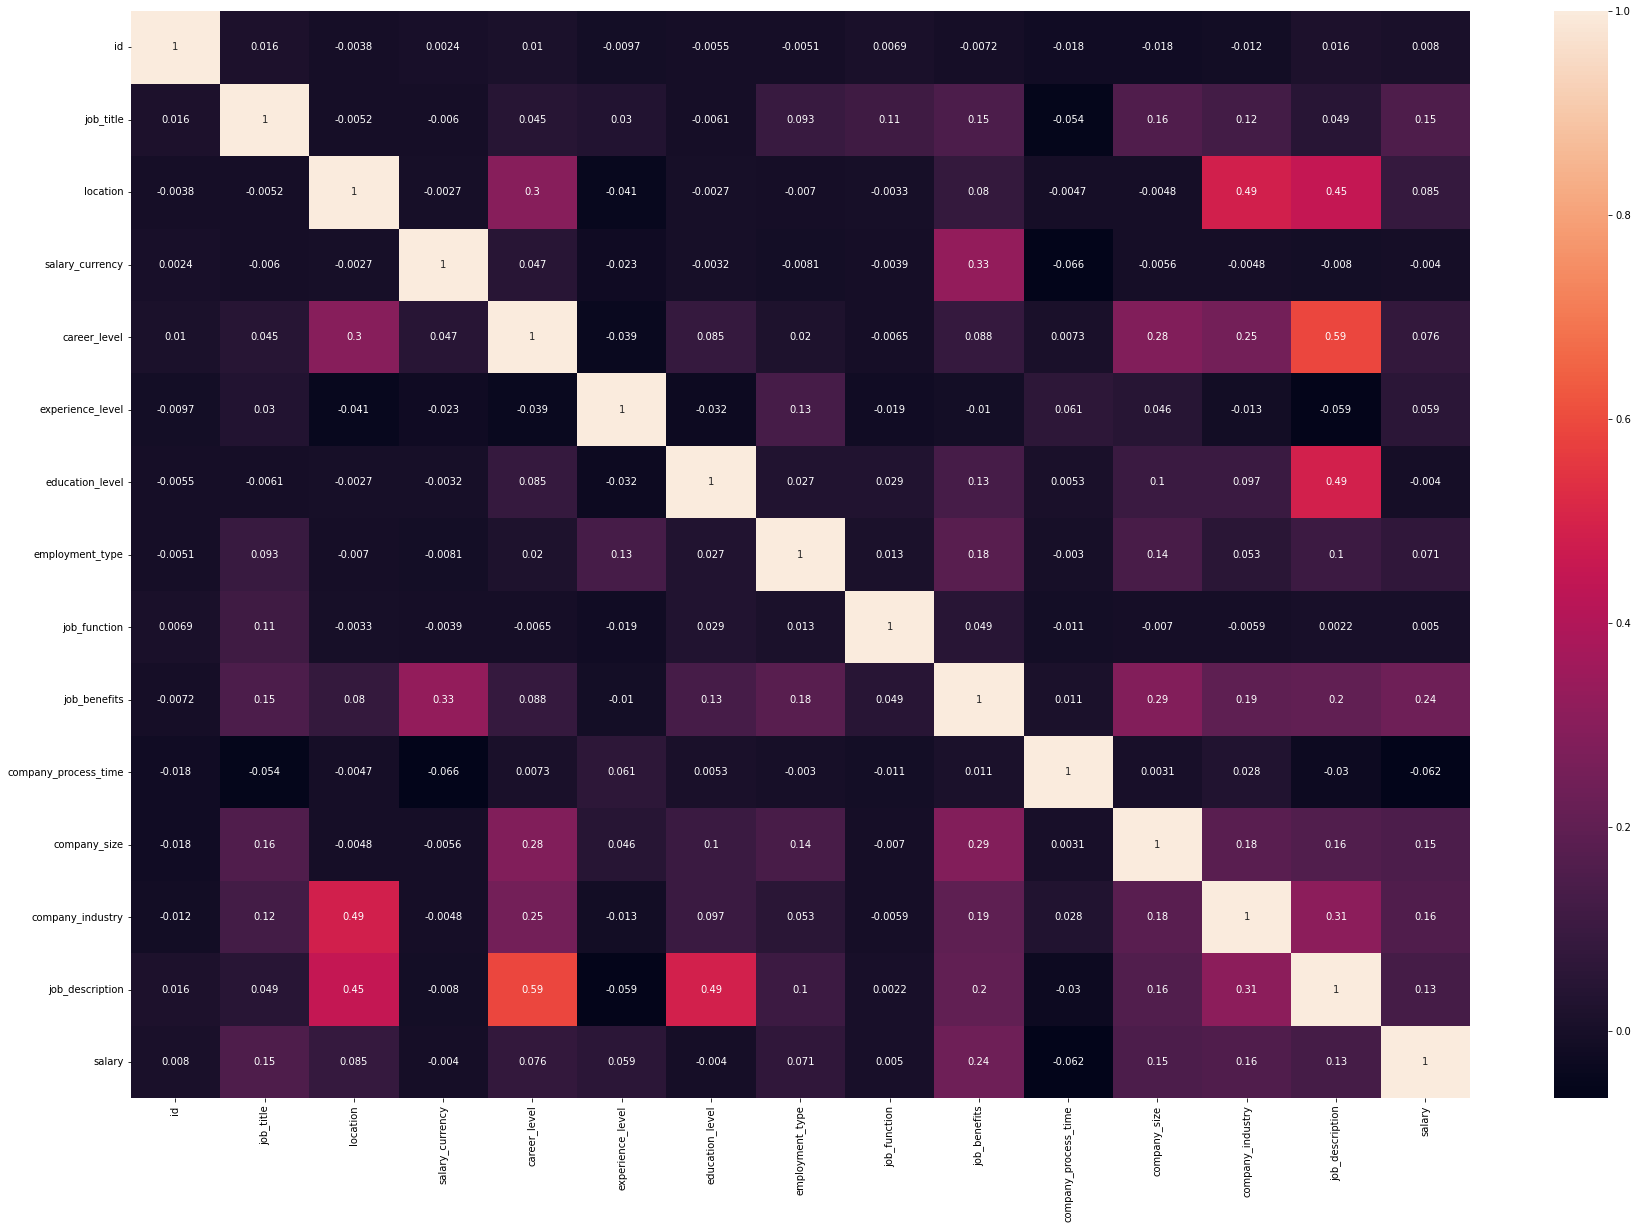

In [267]:
plt.figure(figsize=(30,20))
sns.heatmap(data_train.corr(),annot=True)

In [268]:
data_train.describe()

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
count,3440.000000,3440.000000,3440.000000,3440.0,3440.00000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3.440000e+03
mean,15852.253488,0.000129,0.003639,1.0,0.01468,2.329651,0.128953,0.138301,0.003280,0.018442,21.022965,0.071124,0.002856,0.004563,7.175945e+06
std,9223.297127,0.007575,0.058384,0.0,0.08442,1.562889,0.154805,0.345174,0.042904,0.107146,8.704632,0.210026,0.039381,0.032224,4.460840e+06
min,10.000000,0.000000,0.000000,1.0,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.150000e+06
25%,7740.750000,0.000000,0.000000,1.0,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,4.750000e+06
50%,15997.500000,0.000000,0.000000,1.0,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,6.500000e+06
75%,23955.750000,0.000000,0.000000,1.0,0.00000,3.000000,0.346080,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,7.500000e+06
max,31745.000000,0.444311,1.000000,1.0,0.50000,15.000000,0.368424,1.000000,0.564244,0.812248,30.000000,0.691146,0.545765,0.524273,1.050000e+08


In [269]:
X_train.drop(columns=["location","career_level","employment_type","experience_level","id","job_function","salary_currency","education_level","company_process_time"],inplace=True)

In [270]:
X_train

,job_title,job_benefits,company_size,company_industry,job_description
9,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,0.0,0.0
34,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
31673,0.0,0.0,0.0,0.0,0.0
31707,0.0,0.0,0.0,0.0,0.0
31719,0.0,0.0,0.0,0.0,0.0
31732,0.0,0.0,0.0,0.0,0.0


In [271]:
X_train.describe()

,job_title,job_benefits,company_size,company_industry,job_description
count,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000
mean,0.003014,0.000891,0.001342,0.000892,0.004563
std,0.028111,0.010639,0.013400,0.010481,0.032224
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.430862,0.219479,0.233558,0.210000,0.524273


In [272]:
X_train["job_title"].value_counts()

0.000000    3391
0.218170       8
0.084722       6
0.082365       3
0.244919       2
0.155842       2
0.361193       1
0.342082       1
0.229592       1
0.262794       1
0.275832       1
0.121092       1
0.430862       1
0.195554       1
0.402299       1
0.243558       1
0.298694       1
0.137189       1
0.297271       1
0.339536       1
0.202715       1
0.402312       1
0.248705       1
0.391686       1
0.253655       1
0.041374       1
0.082046       1
0.044365       1
0.339256       1
0.339628       1
0.362970       1
0.086495       1
0.185711       1
0.148970       1
Name: job_title, dtype: int64

In [273]:
X_train["job_benefits"].value_counts()

0.000000    3410
0.068050       7
0.051282       4
0.088926       2
0.219479       2
0.218456       1
0.081543       1
0.098550       1
0.076481       1
0.050525       1
0.135229       1
0.117558       1
0.106654       1
0.114485       1
0.089543       1
0.099034       1
0.188797       1
0.180114       1
0.100841       1
0.108388       1
Name: job_benefits, dtype: int64

In [274]:
X_train["company_size"].value_counts()

0.000000    3400
0.135680       6
0.107274       4
0.085490       3
0.052197       1
0.077550       1
0.187447       1
0.072736       1
0.048051       1
0.082672       1
0.142862       1
0.053267       1
0.189739       1
0.233558       1
0.134675       1
0.207758       1
0.129069       1
0.183250       1
0.096378       1
0.085159       1
0.080929       1
0.197798       1
0.163646       1
0.072227       1
0.086132       1
0.094185       1
0.053014       1
0.179552       1
0.080606       1
0.085647       1
0.047094       1
Name: company_size, dtype: int64

In [275]:
X_train["company_industry"].value_counts()

0.000000    3413
0.123591       7
0.151611       3
0.111175       1
0.077845       1
0.051426       1
0.108613       1
0.072409       1
0.160639       1
0.050798       1
0.085380       1
0.079463       1
0.123757       1
0.138135       1
0.095508       1
0.091140       1
0.210000       1
0.100800       1
0.091662       1
0.100306       1
Name: company_industry, dtype: int64

In [276]:
X_train["job_description"].value_counts()

0.000000    3344
0.291500       7
0.058898       6
0.104122       4
0.086269       4
            ... 
0.069213       1
0.082801       1
0.085346       1
0.087405       1
0.043367       1
Name: job_description, Length: 74, dtype: int64

In [277]:
from sklearn.preprocessing import StandardScaler
data_scaller=StandardScaler()
X_train_scaller=data_scaller.fit_transform(X_train)
X_train_scaller

array([[-0.10725061, -0.0837444 , -0.10017539, -0.08513313, -0.14162592],
       [-0.10725061, -0.0837444 , -0.10017539, -0.08513313, -0.14162592],
       [-0.10725061, -0.0837444 , -0.10017539, -0.08513313, -0.14162592],
       ...,
       [-0.10725061, -0.0837444 , -0.10017539, -0.08513313, -0.14162592],
       [-0.10725061, -0.0837444 , -0.10017539, -0.08513313, -0.14162592],
       [-0.10725061, -0.0837444 , -0.10017539, -0.08513313, -0.14162592]])

In [278]:
y_train_scaller = data_scaller.fit_transform(y_train.values.reshape(-1,1))

In [279]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import numpy as np


In [280]:
LIR_models=LinearRegression()
SVR_models=SVR()
Ridge_models=Ridge()
SGDR_models=SGDRegressor()
RFR_models=RandomForestRegressor()
MLPR_models=MLPRegressor()
GBR_models=GradientBoostingRegressor()


In [281]:
models={
    "LIR" : LIR_models,
    "SVR" : SVR_models,
    "RIDGE" : Ridge_models,
    "SGDR" : SGDR_models,
    "MLPR" : MLPR_models,
    "RFR" : RFR_models,
    "GBR" : GBR_models
}

In [282]:
# tarik data testing
X_test=pd.read_csv("data_test.csv")
X_test

,job_title,job_benefits,company_size,company_industry,job_description
0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...
1598,0.0,0.0,0.000000,0.000000,0.0
1599,0.0,0.0,0.000000,0.000000,0.0
1600,0.0,0.0,0.000000,0.000000,0.0
1601,0.0,0.0,0.057699,0.057699,0.0


In [283]:
data_test=pd.concat([X_test,y_test],axis=1)
mean2=data_test.mean()
data_test.fillna(mean2,inplace=True)
data_test

,job_title,job_benefits,company_size,company_industry,job_description,salary
0,0.000000,0.000000,0.00000,0.00000,0.000000,7.206817e+06
1,0.000000,0.000000,0.00000,0.00000,0.000000,7.206817e+06
2,0.000000,0.000000,0.00000,0.00000,0.000000,7.206817e+06
3,0.000000,0.000000,0.00000,0.00000,0.000000,7.206817e+06
4,0.000000,0.000000,0.00000,0.00000,0.000000,7.206817e+06
...,...,...,...,...,...,...
31523,0.003255,0.000497,0.00018,0.00018,0.005298,1.100000e+07
31536,0.003255,0.000497,0.00018,0.00018,0.005298,1.600000e+07
31548,0.003255,0.000497,0.00018,0.00018,0.005298,7.200000e+06
31636,0.003255,0.000497,0.00018,0.00018,0.005298,5.300000e+06


In [284]:
y_test=data_test["salary"]
y_test

0        7.206817e+06
1        7.206817e+06
2        7.206817e+06
3        7.206817e+06
4        7.206817e+06
             ...     
31523    1.100000e+07
31536    1.600000e+07
31548    7.200000e+06
31636    5.300000e+06
31732    8.000000e+06
Name: salary, Length: 2260, dtype: float64

In [285]:
X_test=data_test.drop(["salary"],axis=1)
X_test

,job_title,job_benefits,company_size,company_industry,job_description
0,0.000000,0.000000,0.00000,0.00000,0.000000
1,0.000000,0.000000,0.00000,0.00000,0.000000
2,0.000000,0.000000,0.00000,0.00000,0.000000
3,0.000000,0.000000,0.00000,0.00000,0.000000
4,0.000000,0.000000,0.00000,0.00000,0.000000
...,...,...,...,...,...
31523,0.003255,0.000497,0.00018,0.00018,0.005298
31536,0.003255,0.000497,0.00018,0.00018,0.005298
31548,0.003255,0.000497,0.00018,0.00018,0.005298
31636,0.003255,0.000497,0.00018,0.00018,0.005298


In [286]:
X_test_scaller=data_scaller.fit_transform(X_test)
X_test_scaller

array([[-1.31469785e-01, -5.90191154e-02, -6.64177368e-02,
        -6.64177368e-02, -1.76483503e-01],
       [-1.31469785e-01, -5.90191154e-02, -6.64177368e-02,
        -6.64177368e-02, -1.76483503e-01],
       [-1.31469785e-01, -5.90191154e-02, -6.64177368e-02,
        -6.64177368e-02, -1.76483503e-01],
       ...,
       [ 0.00000000e+00, -1.28723280e-17,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.28723280e-17,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.28723280e-17,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

In [287]:
y_test_scaller=data_scaller.fit_transform(y_test.values.reshape(-1,1))
y_test_scaller

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-0.00260201],
       [-0.72778946],
       [ 0.30274007]])

In [288]:
print(X_train.shape)
print(y_train_scaller.shape)
print(X_test_scaller.shape)
print(y_test.shape)
# model1.fit(X_test_scaller,y_train_scaller)

(3440, 5)
(3440, 1)
(2260, 5)
(2260,)


In [289]:
def train_regresor(clf,X_train_scaller,y_train_scaller,X_test_scaller,y_test_scaller):
    clf.fit(X_train_scaller,y_train_scaller)
    y_pred = cross_val_predict(clf,X_test_scaller,y_test,cv=3)
    akurasi = mean_squared_error(y_test,y_pred)
    akurasi = np.sqrt(akurasi)
    return akurasi

In [290]:
accuracy_scores = []
scores = []

for name,clf in models.items():
    current_accuracy= train_regresor(clf,X_train_scaller,y_train,X_test_scaller,y_test)
    print("For ",name)
    print("Eror ",current_accuracy)
    accuracy_scores.append(current_accuracy)


For  LIR
Eror  2620017.32643213
For  SVR
Eror  2620012.269062801
For  RIDGE
Eror  2620017.3254018263
For  SGDR
Eror  2620012.880656712


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

For  MLPR
Eror  7667789.312496975
For  RFR
Eror  2620012.027539728
For  GBR
Eror  2620014.458765868


In [291]:
performance_df = pd.DataFrame({"Algorithm":models.keys(),"Error":accuracy_scores}).sort_values("Error",ascending=True)

In [292]:
performance_df

,Algorithm,Error
5,RFR,2.620012e+06
1,SVR,2.620012e+06
3,SGDR,2.620013e+06
6,GBR,2.620014e+06
2,RIDGE,2.620017e+06
0,LIR,2.620017e+06
4,MLPR,7.667789e+06


3 models terbaik SVR, ridge dan LIR

In [293]:
voting = VotingRegressor(estimators=[("SVR",SVR_models),("GBR",GBR_models),("RIDGE",Ridge_models)])

In [294]:
voting.fit(X_train_scaller,y_train)

VotingRegressor(estimators=[('SVR', SVR()),
                            ('GBR', GradientBoostingRegressor()),
                            ('RIDGE', Ridge())])

In [295]:
y_pred=voting.predict(X_test_scaller)
akurasi=mean_squared_error(y_test,y_pred)
akurasi= np.sqrt(akurasi)
mae=mean_absolute_error(y_test,y_pred)
print("RMSE : ",akurasi)
print("MAE : ",mae)

RMSE :  2639606.707329278
MAE :  1140598.0743420299


In [296]:
y_pred

array([6952012.8033604 , 6952012.8033604 , 6952012.8033604 , ...,
       6950028.51337259, 6950028.51337259, 6950028.51337259])

In [330]:
y_pred = pd.DataFrame(y_pred)
y_pred.rename(columns={'0':'salary'})
#kenapa kolomnya ga mau keganti

,0
0,6.952013e+06
1,6.952013e+06
2,6.952013e+06
3,6.952013e+06
4,6.952013e+06
...,...
2255,6.950029e+06
2256,6.950029e+06
2257,6.950029e+06
2258,6.950029e+06


In [326]:
y_pred.to_csv("submission.csv")

PermissionError: [Errno 13] Permission denied: 'submission.csv'